# ARIMA 2
- Revisão
- I do ARIMA
- ARI
- MA
- IMA
- ARIMA

### Preparação

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
import warnings
from statsmodels.datasets import co2, get_rdataset
from statsmodels.tsa.ar_model import AutoReg


In [143]:
def all_ac(Y):
    fig, ax = plt.subplots(1, 2, figsize=(16,5))
    plot_acf(Y, zero=False, ax=ax[0])
    plot_pacf(Y, zero=False, ax=ax[1])
    plt.show()

def plot_forecast(serie_original, previsao):
    plt.rcParams["figure.figsize"] = [12, 5]
    plt.plot(serie_original, label='Serie Histórica', linestyle='-')  
    plt.plot(previsao, label='Previsão', linestyle='--')  
    plt.xlabel('Data')
    plt.ylabel('Valores')
    plt.title('Serie histórica com previsão')
    plt.legend()
    plt.show()
    
def teste_estacionariedade(s):
    kps = kpss(s)
    adf = adfuller(s)
    
    kpss_pv, adf_pv = kps[1], adf[1]
    kpssh, adfh = 'Estacionário', 'Não Estacionário'
    
    if adf_pv < 0.05:
        adfh = 'Estacionário'
    if kpss_pv < 0.05:
        kpssh = 'Não Estacionário'
    return (kpssh, adfh)

### Tabela para o primeiro exemplo

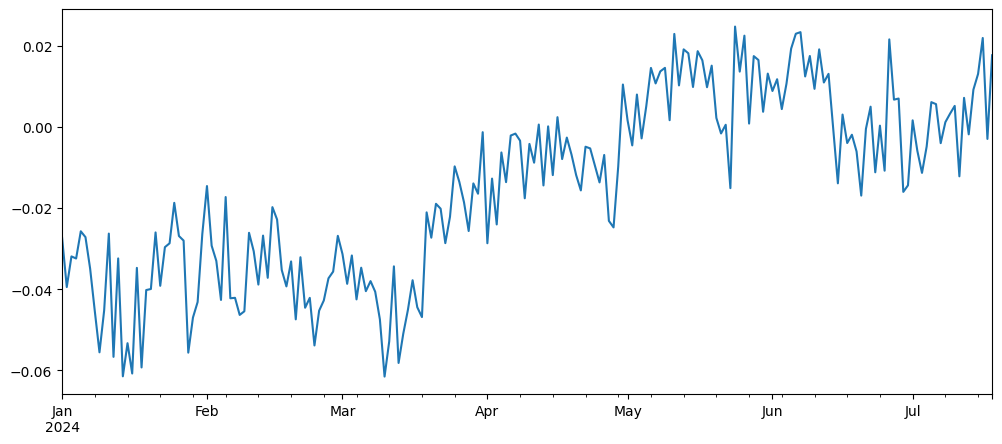

In [ ]:
df = pd.read_csv('../../dados/AR_Exemplo.csv')
Y = pd.Series(df['preco_diff'])
Y.index = pd.date_range(start='2024-01-01', periods=200)
plt.rcParams["figure.figsize"] = [12, 5]
Y.plot()
plt.show()

### Ajuste que fizemos na última aula:
$$ Y_t = \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \phi_3 Y_{t-3} + \epsilon_t $$

In [145]:
primeira_ordem = Y.diff().dropna()
model1 = AutoReg(primeira_ordem, lags=3, trend='n').fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:             preco_diff   No. Observations:                  199
Model:                     AutoReg(3)   Log Likelihood                 624.540
Method:               Conditional MLE   S.D. of innovations              0.010
Date:                Tue, 25 Feb 2025   AIC                          -1241.080
Time:                        14:21:33   BIC                          -1227.968
Sample:                    01-05-2024   HQIC                         -1235.772
                         - 07-18-2024                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
preco_diff.L1    -0.5873      0.069     -8.572      0.000      -0.722      -0.453
preco_diff.L2    -0.2339      0.079     -2.964      0.003      -0.389      -0.079
preco_diff.L3    -0.2887      0.069     -4.179      0.000      -0.424      -0.153
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2982           -0.0000j            1.2982           -0.5000
AR.2            0.2440           -1.6150j            1.6333           -0.2261
AR.3            0.2440           +1.6150j            1.6333            0.2261
-----------------------------------------------------------------------------
"""

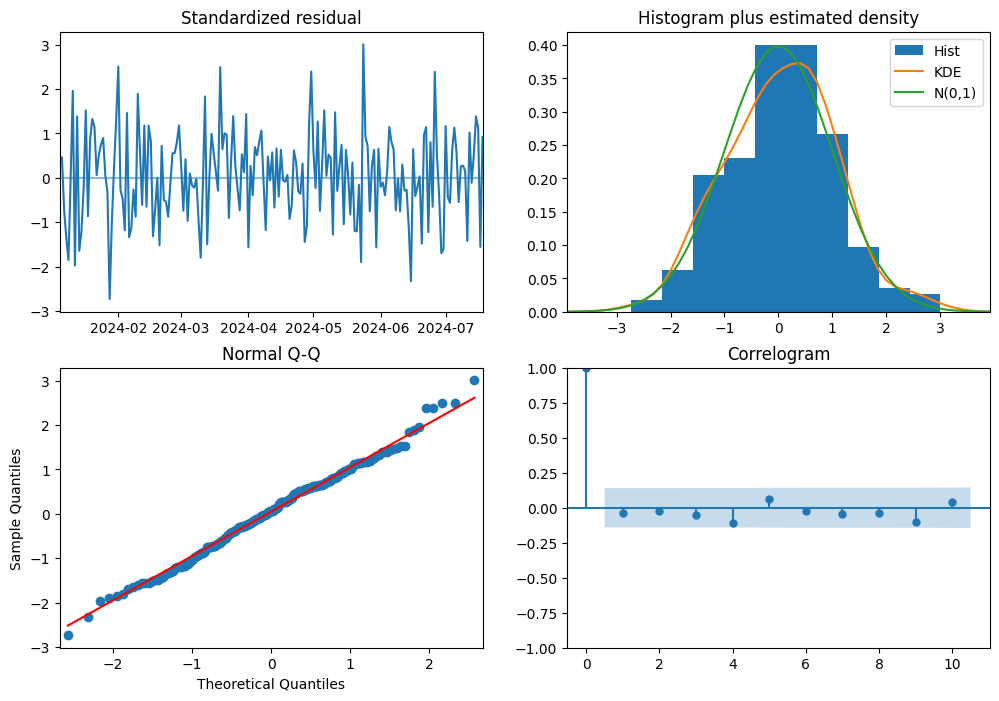

In [146]:
plt.rcParams["figure.figsize"] = [12, 8]
model1.plot_diagnostics()
plt.show()

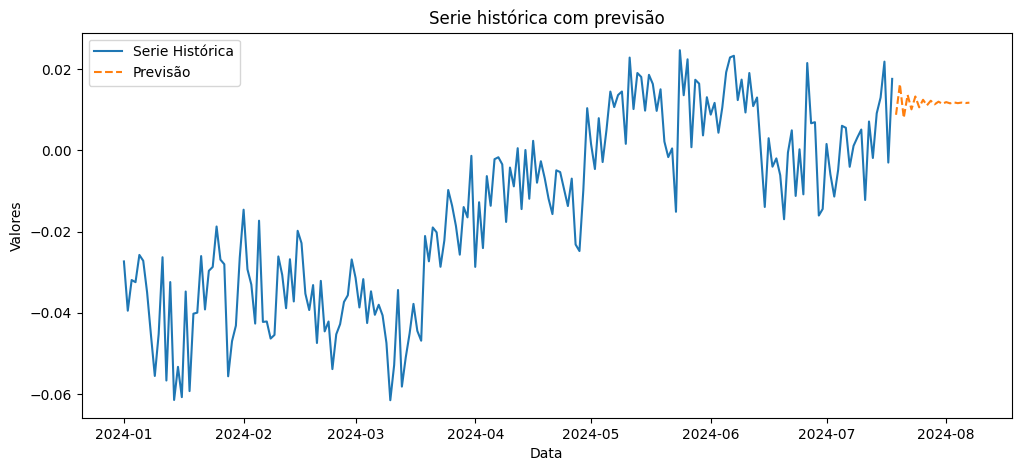

In [147]:
previsao = Y.iloc[-1] + model1.forecast(20).cumsum()
plot_forecast(Y,previsao)

Os próximos exemplos são longe do ideal, eu estou apenas mostrando algumas opções que não exploramos do AutoReg. Por exemplo, adicionar constante no modelo (phi 0):
$$ Y_t = \phi_0 + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \phi_3 Y_{t-3} + \epsilon_t $$

                            AutoReg Model Results                             
Dep. Variable:             preco_diff   No. Observations:                  199
Model:                     AutoReg(3)   Log Likelihood                 624.762
Method:               Conditional MLE   S.D. of innovations              0.010
Date:                Tue, 25 Feb 2025   AIC                          -1239.525
Time:                        14:21:33   BIC                          -1223.134
Sample:                    01-05-2024   HQIC                         -1232.889
                         - 07-18-2024                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0005      0.001      0.667      0.505      -0.001       0.002
preco_diff.L1    -0.5888      0.068     -8.599      0.000      -0.723      -0.455
preco_diff.L2    -0.2366      0.079     

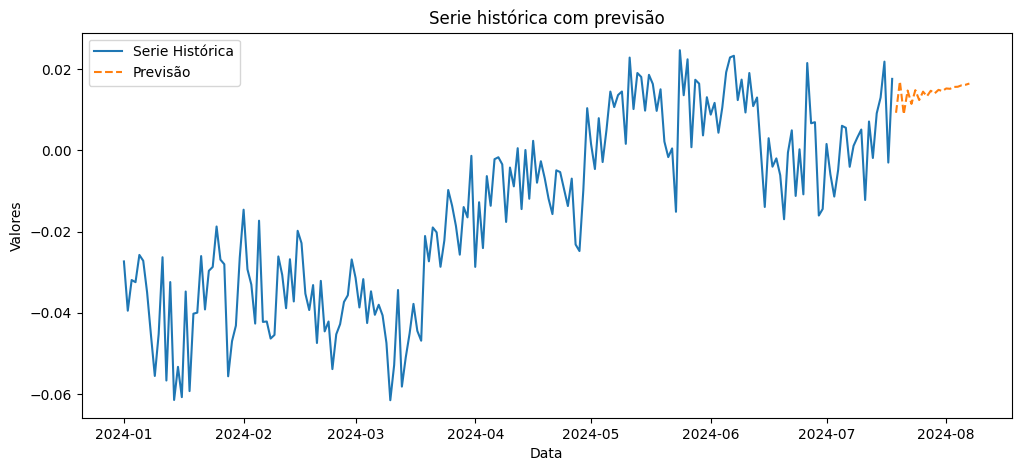

In [148]:
model2 = AutoReg(primeira_ordem, lags=3, trend='c').fit()
print(model2.summary())
previsao = Y.iloc[-1] + model2.forecast(20).cumsum()
plot_forecast(Y,previsao)

Ao invés de usar a série diferenciada, algumas pessoas podem querer adicionar uma tendência determinística na fórmula:
$$ 
Y_t = \phi_0 + \beta t + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \phi_3 Y_{t-3} + \epsilon_t 
$$

                            AutoReg Model Results                             
Dep. Variable:             preco_diff   No. Observations:                  200
Model:                     AutoReg(3)   Log Likelihood                 627.724
Method:               Conditional MLE   S.D. of innovations              0.010
Date:                Tue, 25 Feb 2025   AIC                          -1243.448
Time:                        14:21:34   BIC                          -1223.749
Sample:                    01-04-2024   HQIC                         -1235.473
                         - 07-18-2024                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0115      0.003     -3.536      0.000      -0.018      -0.005
trend          7.901e-05   2.29e-05      3.449      0.001    3.41e-05       0.000
preco_diff.L1     0.3514      0.071     

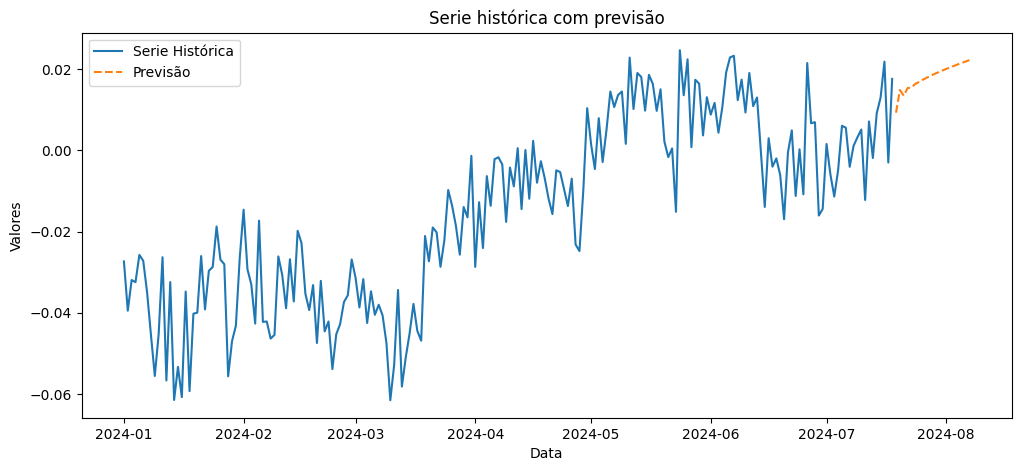

In [149]:
model3 = AutoReg(Y, lags=3, trend='ct').fit()
print(model3.summary())
previsao = model3.forecast(20)
plot_forecast(Y,previsao)

O mesmo modelo pode ser ajustado usando um ARIMA:

                               SARIMAX Results                                
Dep. Variable:             preco_diff   No. Observations:                  199
Model:                 ARIMA(3, 0, 0)   Log Likelihood                 634.775
Date:                Tue, 25 Feb 2025   AIC                          -1261.551
Time:                        14:21:34   BIC                          -1248.378
Sample:                    01-02-2024   HQIC                         -1256.219
                         - 07-18-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5873      0.063     -9.366      0.000      -0.710      -0.464
ar.L2         -0.2339      0.085     -2.756      0.006      -0.400      -0.068
ar.L3         -0.2887      0.066     -4.353      0.0

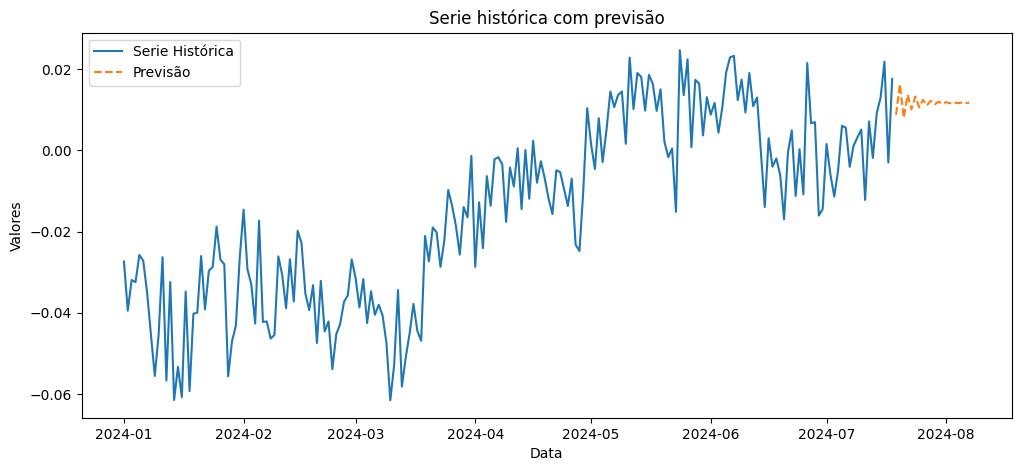

In [150]:
from statsmodels.tsa.arima.model import ARIMA
model4 = ARIMA(primeira_ordem, order=(3, 0, 0), trend='n').fit()
print(model4.summary())
previsao = Y.iloc[-1] + model4.forecast(20).cumsum()
plot_forecast(Y,previsao)


## MA

$$ \large Y_t = \mu + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \dots + \theta_q \epsilon_{t-q} + \epsilon_t $$

$$ \large Y_t = \mu + \theta_1 \epsilon_{t-1} + \epsilon_t $$

$$ \large Y_t = \mu + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \epsilon_t $$


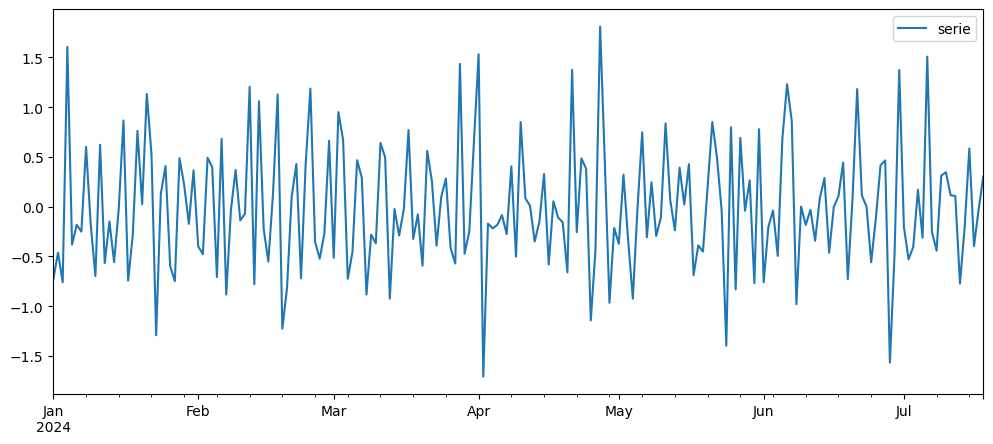

In [ ]:
Y = pd.read_csv('../../dados/MA_Exemplo.csv')
Y.index = pd.date_range(start='2024-01-01', periods=200)
Y.plot()
plt.show()

In [152]:
teste_estacionariedade(Y)

/var/folders/f1/tdh3lyp114g78tg5wv2t7g3m0000gn/T/ipykernel_5187/3652473367.py:18: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kps = kpss(s)


('Estacionário', 'Estacionário')

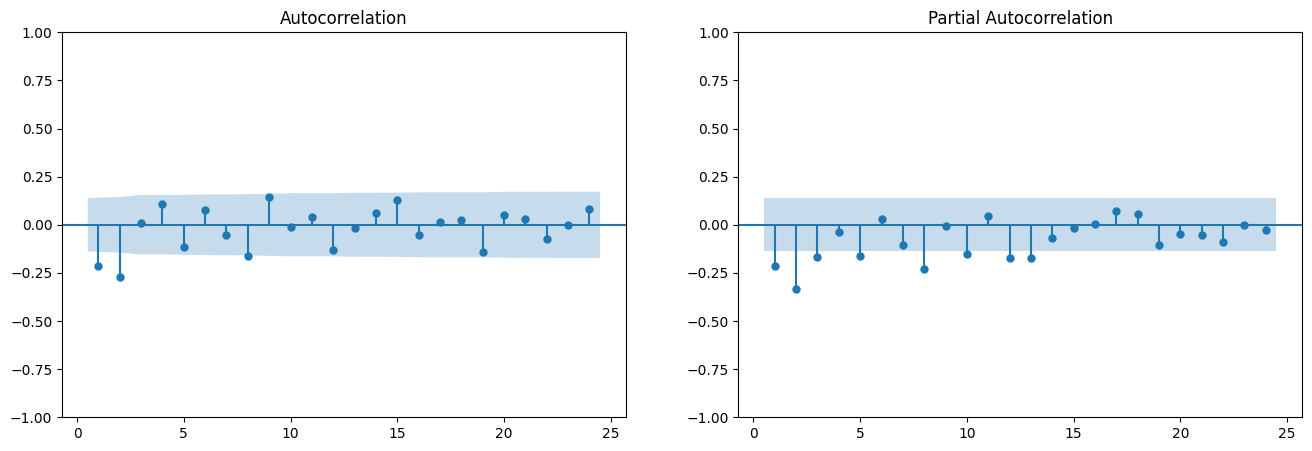

In [153]:
all_ac(Y)

                               SARIMAX Results                                
Dep. Variable:                  serie   No. Observations:                  200
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -161.448
Date:                Tue, 25 Feb 2025   AIC                            330.896
Time:                        14:21:34   BIC                            344.089
Sample:                    01-01-2024   HQIC                           336.235
                         - 07-18-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0012      0.003     -0.391      0.695      -0.007       0.005
ma.L1         -0.5210      0.065     -7.982      0.000      -0.649      -0.393
ma.L2         -0.4138      0.067     -6.175      0.0

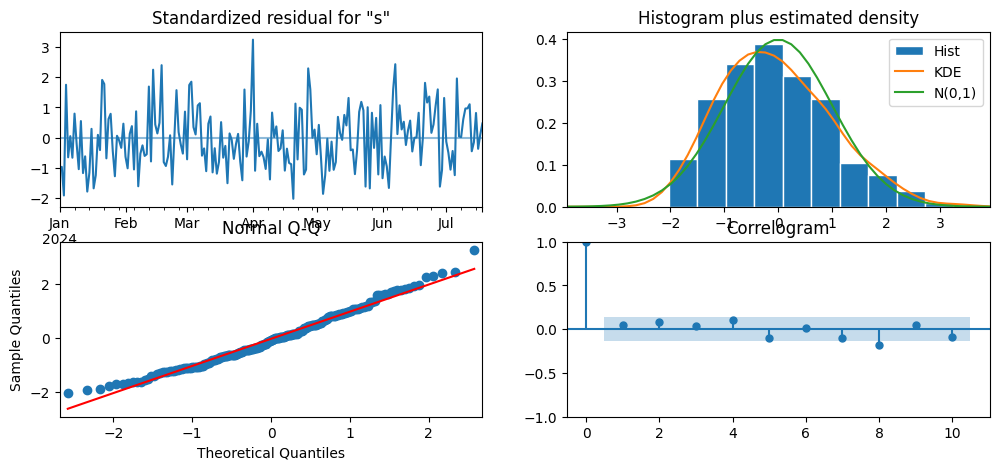

In [154]:
model = ARIMA(Y, order=(0, 0, 2)).fit()
print(model.summary())
model.plot_diagnostics()
plt.show()

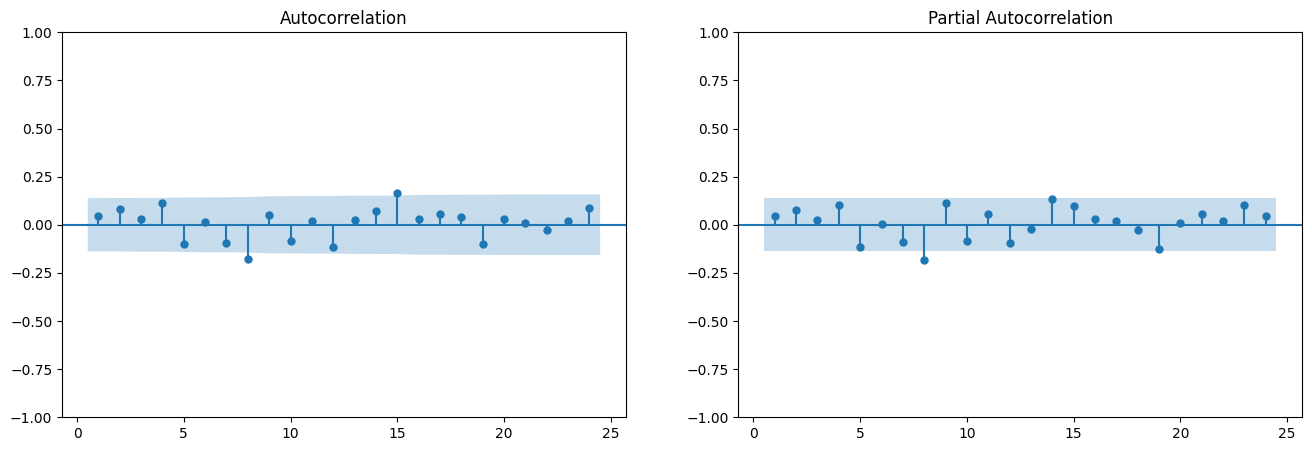

In [155]:
all_ac(model.resid)

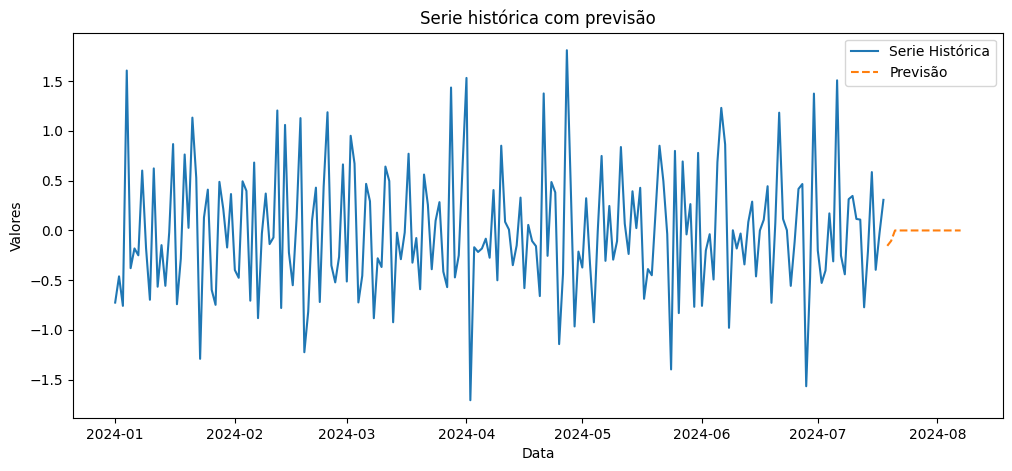

In [156]:
previsao = model.forecast(20)
plot_forecast(Y,previsao)

## ARMA
$$ \large Y_t =  \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \dots + \phi_p Y_{t-p} + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \dots + \theta_q \epsilon_{t-q} + \epsilon_t $$

$$ \large Y_t =  c + \phi_1 Y_{t-1} + \theta_1 \epsilon_{t-1} + \epsilon_t $$

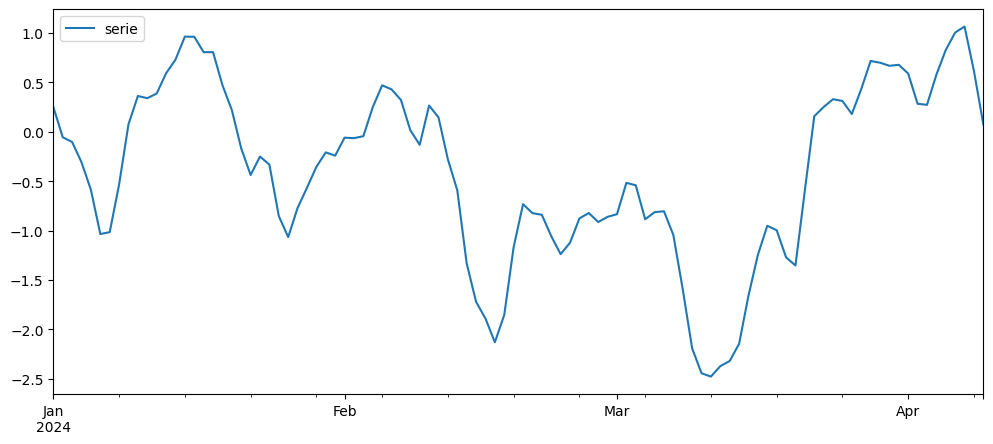

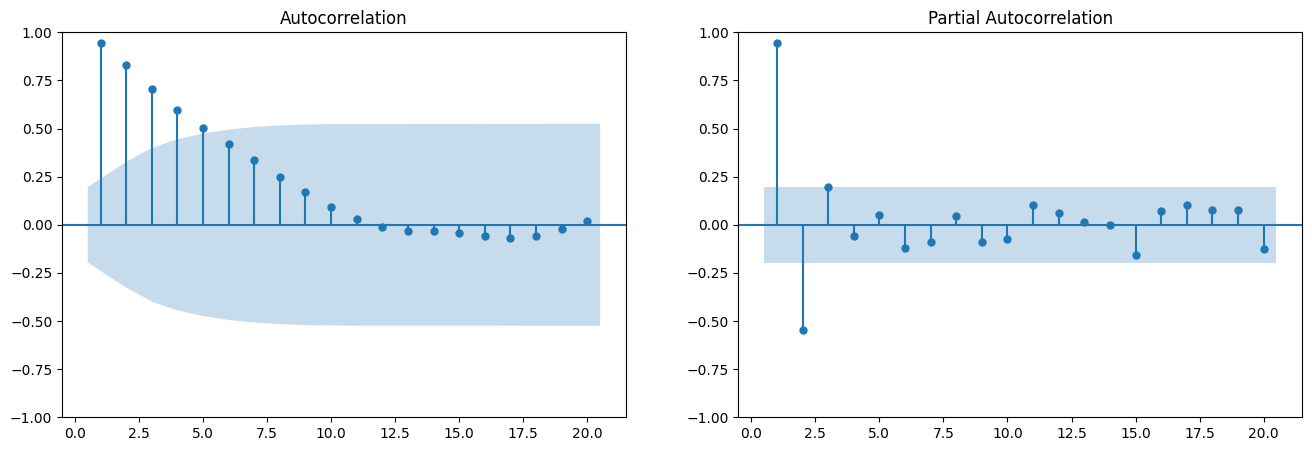

In [ ]:
Y = pd.read_csv('../../dados/ARMA_Exemplo.csv')
Y.index = pd.date_range(start='2024-01-01', periods=100)
Y.plot()
all_ac(Y)

                               SARIMAX Results                                
Dep. Variable:                  serie   No. Observations:                  100
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -17.919
Date:                Tue, 25 Feb 2025   AIC                             39.838
Time:                        14:21:34   BIC                             45.048
Sample:                    01-01-2024   HQIC                            41.946
                         - 04-09-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9480      0.027     35.305      0.000       0.895       1.001
sigma2         0.0819      0.011      7.232      0.000       0.060       0.104
Ljung-Box (L1) (Q):                  30.64   Jarque-

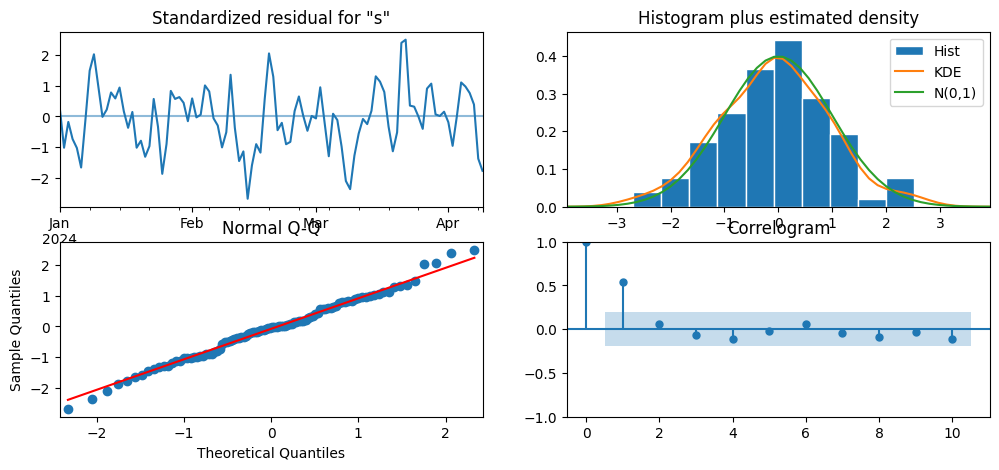

In [158]:
model = ARIMA(Y, order=(1, 0, 0), trend='n').fit()
print(model.summary())
model.plot_diagnostics()
plt.show()

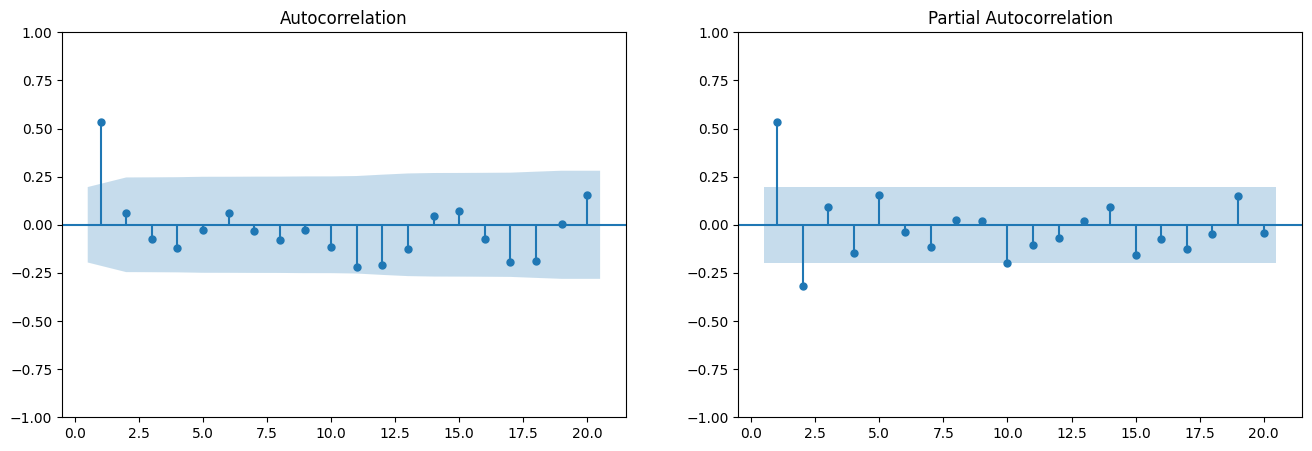

In [159]:
all_ac(model.resid)

                               SARIMAX Results                                
Dep. Variable:                  serie   No. Observations:                  100
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -17.919
Date:                Tue, 25 Feb 2025   AIC                             39.838
Time:                        14:21:35   BIC                             45.048
Sample:                    01-01-2024   HQIC                            41.946
                         - 04-09-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9480      0.027     35.305      0.000       0.895       1.001
sigma2         0.0819      0.011      7.232      0.000       0.060       0.104
Ljung-Box (L1) (Q):                  30.64   Jarque-

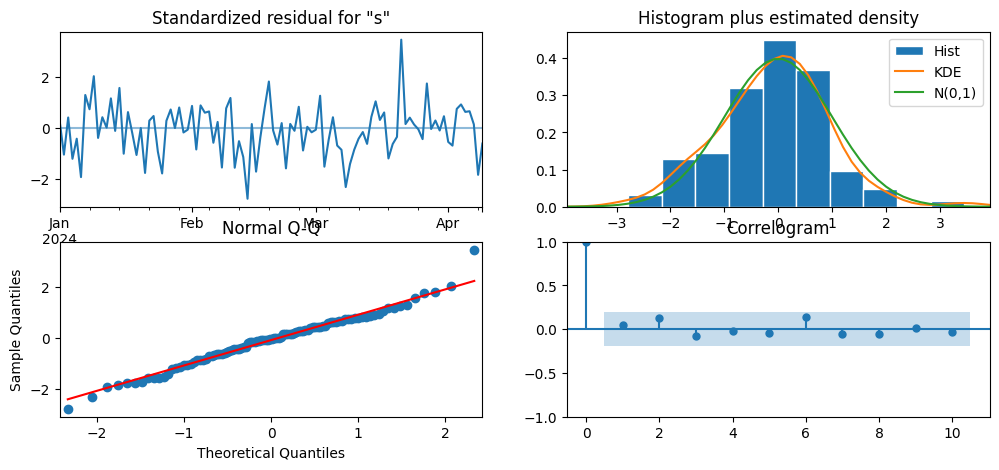

In [160]:
model1 = ARIMA(Y, order=(1, 0, 1), trend='n').fit()
print(model.summary())
model1.plot_diagnostics()
plt.show()

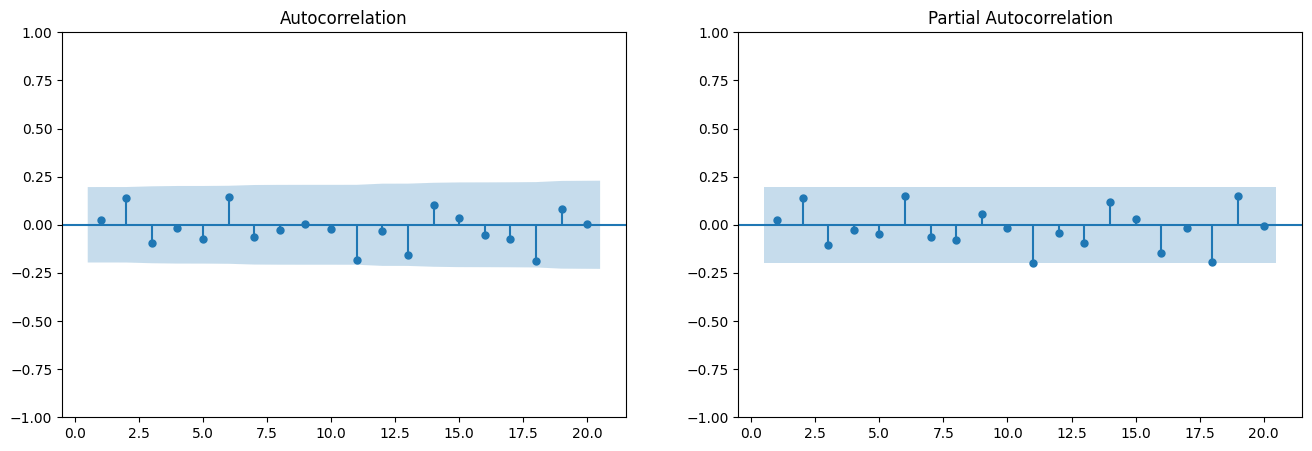

In [161]:
all_ac(model1.resid)

                               SARIMAX Results                                
Dep. Variable:                  serie   No. Observations:                  100
Model:                 ARIMA(2, 0, 0)   Log Likelihood                   2.557
Date:                Tue, 25 Feb 2025   AIC                              0.886
Time:                        14:21:35   BIC                              8.702
Sample:                    01-01-2024   HQIC                             4.049
                         - 04-09-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5132      0.086     17.571      0.000       1.344       1.682
ar.L2         -0.5868      0.088     -6.645      0.000      -0.760      -0.414
sigma2         0.0539      0.008      7.073      0.0

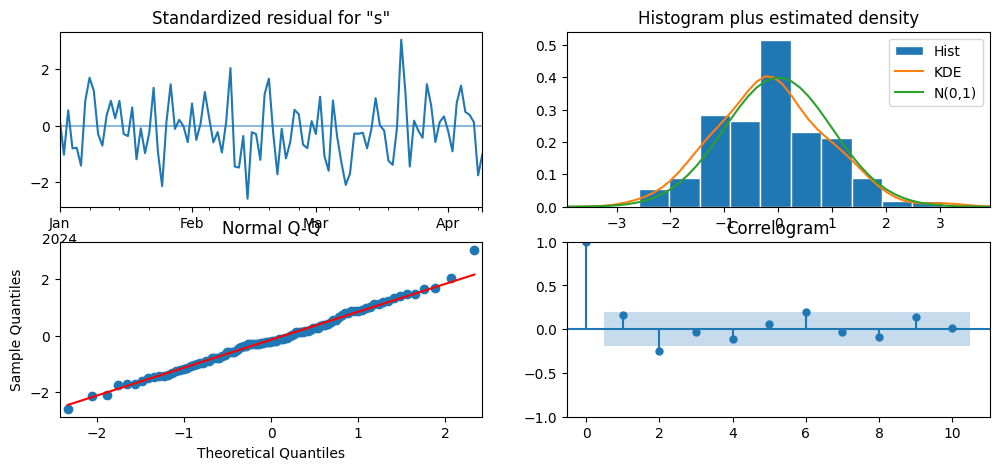

In [162]:
model2 = ARIMA(Y, order=(2, 0, 0), trend='n').fit()
print(model2.summary())
model2.plot_diagnostics()
plt.show()

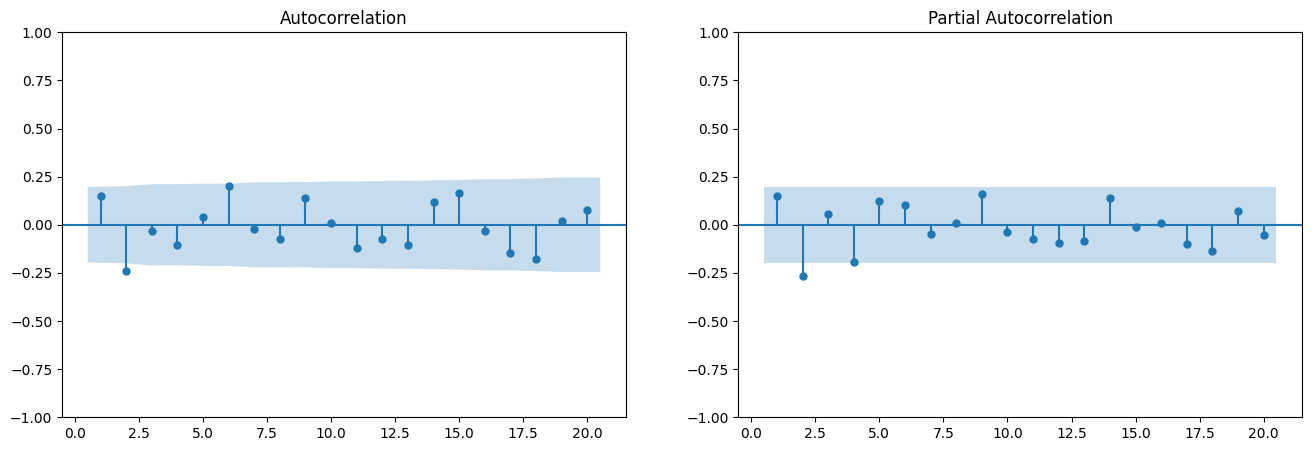

In [163]:
all_ac(model2.resid)

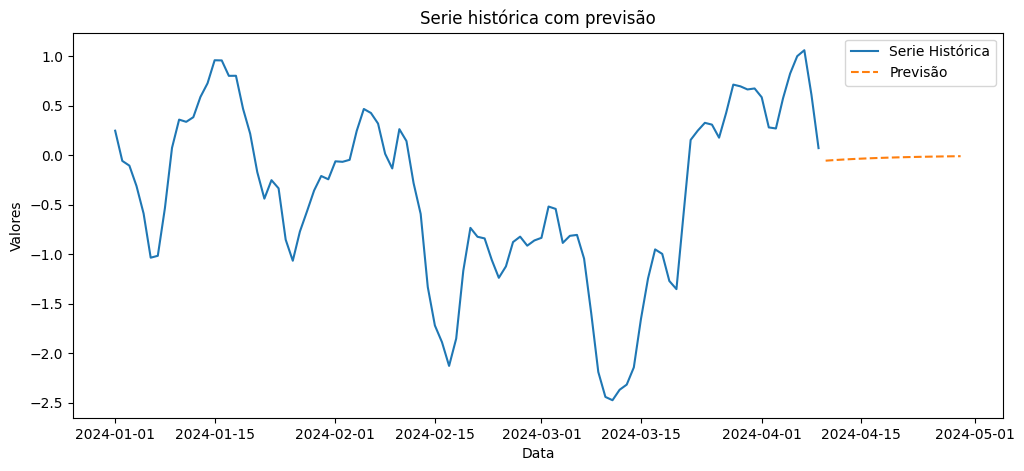

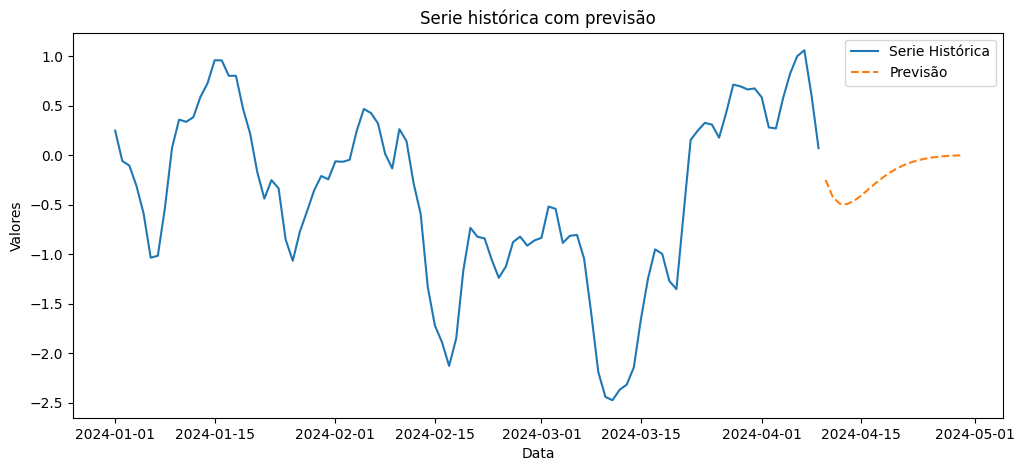

In [164]:
previsao1 = model1.forecast(20)
previsao2 = model2.forecast(20)
plot_forecast(Y,previsao1)
plot_forecast(Y,previsao2)


## I do ARIMA
### ARI
$$ \large  Y_t (1 - B)^d= \phi_0 + \phi_1 Y_{t-1} + \dots + \phi_p Y_{t-p} + \epsilon_t $$
$$ \large B(Y_t) = Y_{t-1} $$

$$ \large  Y_t (1 - B) = Y_t - Y_{t-1} = \phi_0 + \phi_1 Y_{t-1} + \epsilon_t $$


                               SARIMAX Results                                
Dep. Variable:             preco_diff   No. Observations:                  200
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 634.775
Date:                Tue, 25 Feb 2025   AIC                          -1261.551
Time:                        14:21:36   BIC                          -1248.378
Sample:                    01-01-2024   HQIC                         -1256.219
                         - 07-18-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5873      0.063     -9.366      0.000      -0.710      -0.464
ar.L2         -0.2339      0.085     -2.756      0.006      -0.400      -0.068
ar.L3         -0.2887      0.066     -4.353      0.0

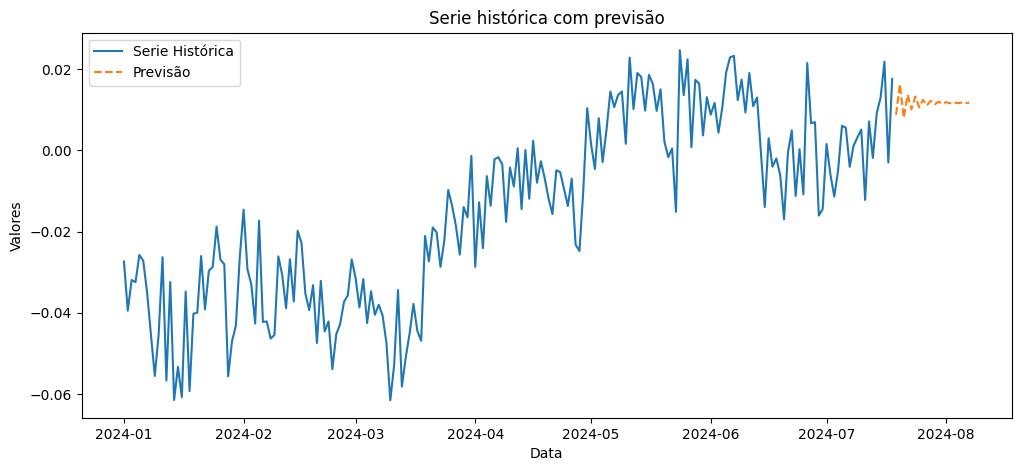

In [ ]:
df = pd.read_csv('../../dados/AR_Exemplo.csv')
Y = pd.Series(df['preco_diff'])
Y.index = pd.date_range(start='2024-01-01', periods=200)
model5 = ARIMA(Y, order=(3, 1, 0)).fit()
print(model5.summary())
previsao = model5.forecast(20)
plot_forecast(Y,previsao)


## IMA
$$ \large (1 - B)^d Y_t = \mu + \theta_1 \epsilon_{t-1} + \dots + \theta_q \epsilon_{t-q} + \epsilon_t$$

$$ \large Y_t(1 - B) = \mu + \theta_1 \epsilon_{t-1} + \epsilon_t$$

## ARIMA
$$ \large (1 - B)^d Y_t = c + \phi_1 Y_{t-1} + \dots + \phi_p Y_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} + \dots + \theta_q \epsilon_{t-q} $$


## Ajustando ARIMA

In [ ]:
# Séries com ações
file = Path('../../dados/closing_price.csv')
closing_price = pd.read_csv(file, index_col='Date',parse_dates=True).resample('MS').mean()
apple = pd.Series(closing_price['AAPL'], name='Preço de Fechamento Apple')
microsoft = pd.Series(closing_price['MSFT'], name='Preço de Fechamento Microsoft')
ibm = pd.Series(closing_price['IBM'], name='Preço de Fechamento IBM')
# Lancamentos Netflix
netf = pd.read_csv('../../dados/netflix_titles.csv')
netf.index = pd.to_datetime(netf['date_added'], format='%B %d, %Y', errors = 'coerce')
lancamentos = netf.resample('MS').size()
netflix = pd.Series(lancamentos[lancamentos.index.year>2015],name='Lançamentos Netflix desde 2016')
# Consumo de Energia
df = pd.read_csv('../../dados/AEP_hourly.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)
AEP = df.resample('MS').sum()/100000
AEP = AEP.drop(AEP.index[-1])
AEP = pd.Series(AEP['AEP_MW'], name='Consumo de Energia')

# Lista com todas as séries
todas_series = [apple,microsoft,ibm, netflix, AEP]

In [ ]:
import geracao_de_series as gc
np.random.seed(40)
Y = pd.Series(gc.generate_arma_series([0.48,0.48], [0,0,0.9],n_samples=365, burn_in=10, noise_std=1))
Y.index = pd.date_range(start= '2024-01-01', periods =365)
Z = 500 + Y.cumsum()
Z.to_csv('../../dados/ARIMA_Exemplo.csv', index=False)

<Axes: >

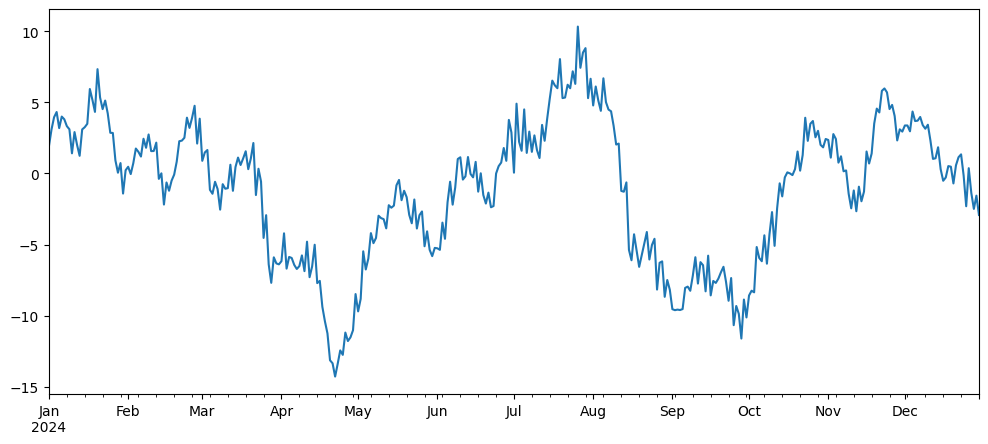

In [168]:
Y.plot()

In [169]:
teste_estacionariedade(Y)

/var/folders/f1/tdh3lyp114g78tg5wv2t7g3m0000gn/T/ipykernel_5187/3652473367.py:18: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kps = kpss(s)


('Estacionário', 'Estacionário')

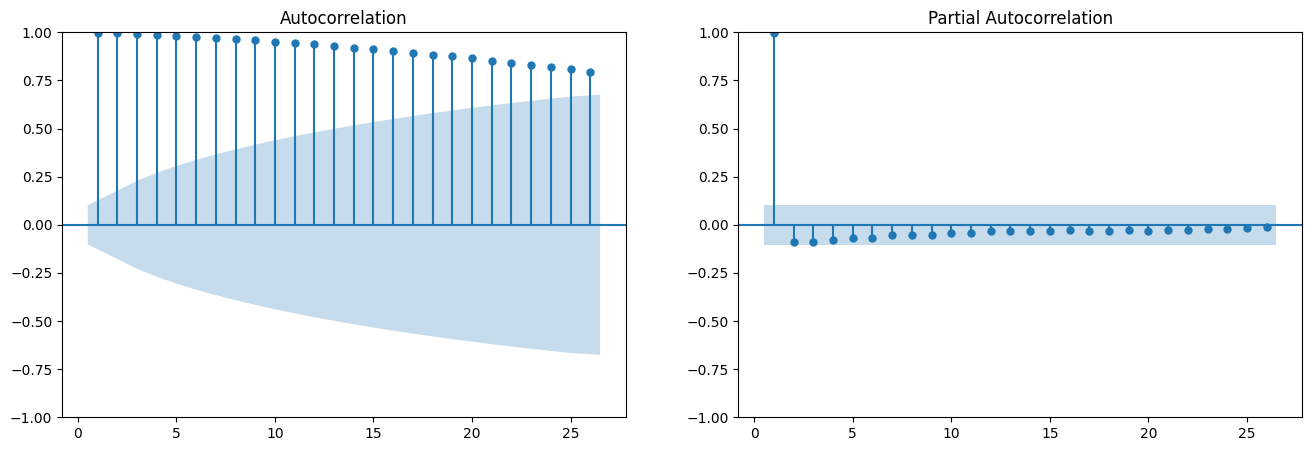

In [170]:
all_ac(Z)

In [171]:
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(Z, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,366.026711,1.371876e-81
2,730.725826,2.113017e-159
3,1093.728311,8.350381e-237
4,1454.675406,0.000000e+00
5,1813.227157,0.000000e+00
6,2169.033187,0.000000e+00
7,2521.784429,0.000000e+00
8,2871.171899,0.000000e+00
9,3216.890145,0.000000e+00
10,3558.662877,0.000000e+00


<Axes: >

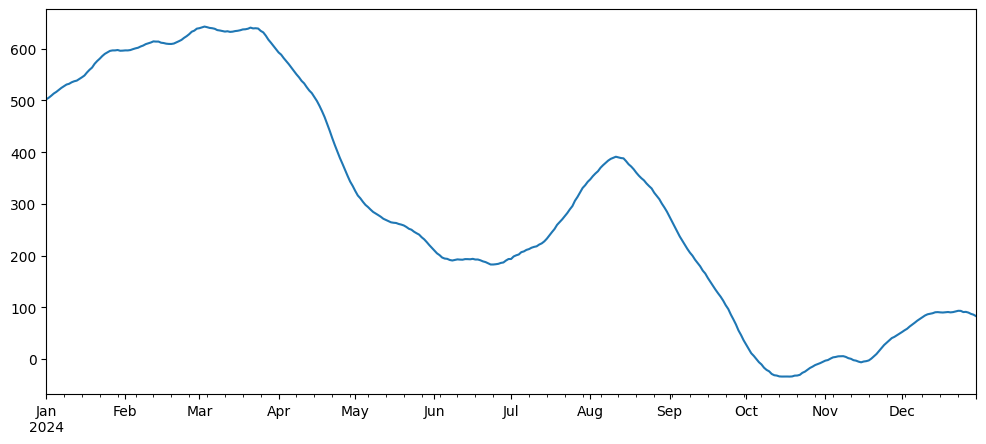

In [172]:
Z.plot()

In [173]:
teste_estacionariedade(Z)

/var/folders/f1/tdh3lyp114g78tg5wv2t7g3m0000gn/T/ipykernel_5187/3652473367.py:18: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kps = kpss(s)


('Não Estacionário', 'Não Estacionário')

<Axes: >

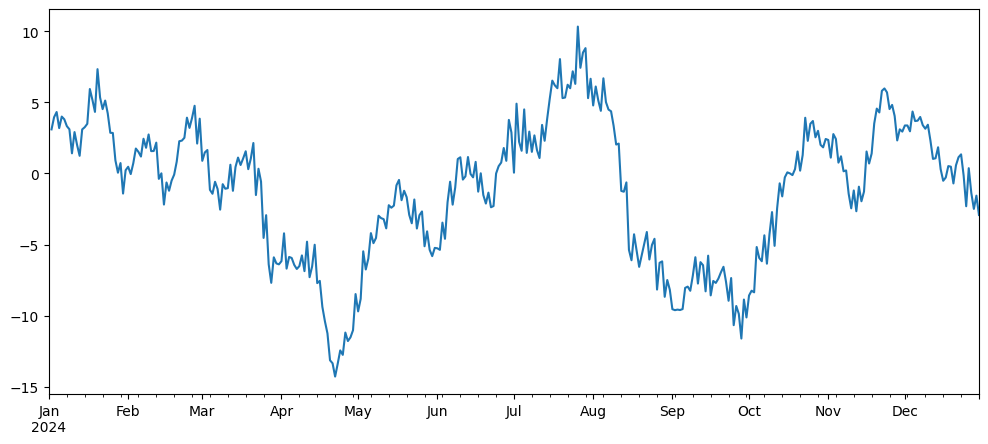

In [174]:
Z.diff().plot()

<Axes: >

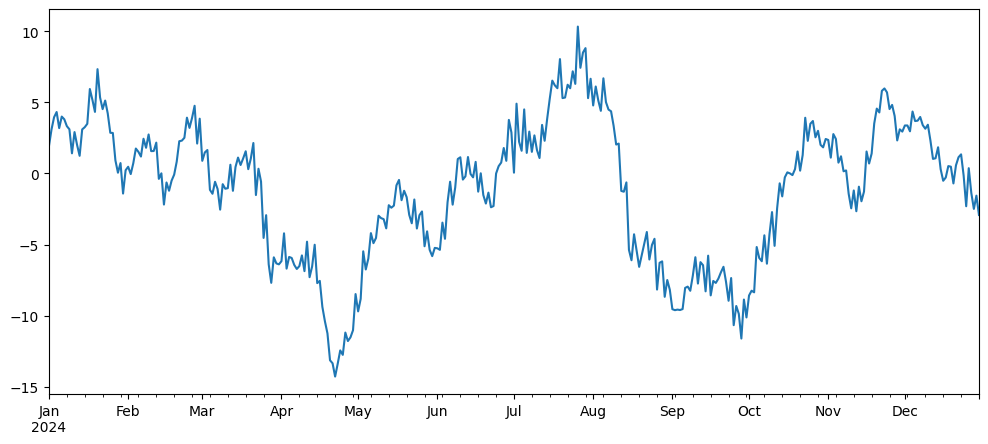

In [175]:
Y.plot()

In [176]:
Y = Z.diff().dropna()
teste_estacionariedade(Y)

/var/folders/f1/tdh3lyp114g78tg5wv2t7g3m0000gn/T/ipykernel_5187/3652473367.py:18: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kps = kpss(s)


('Estacionário', 'Estacionário')

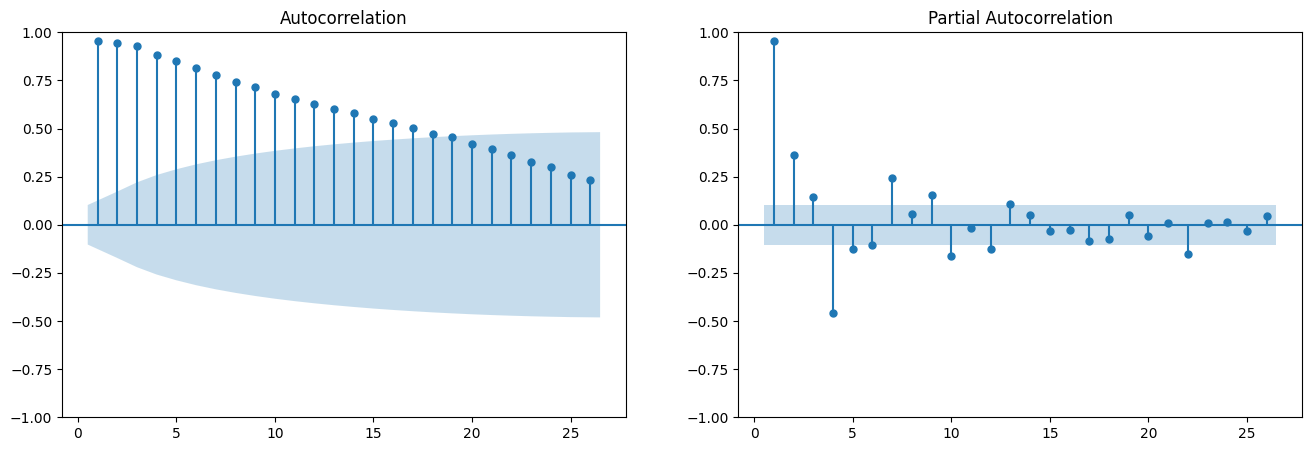

In [177]:
all_ac(Y)

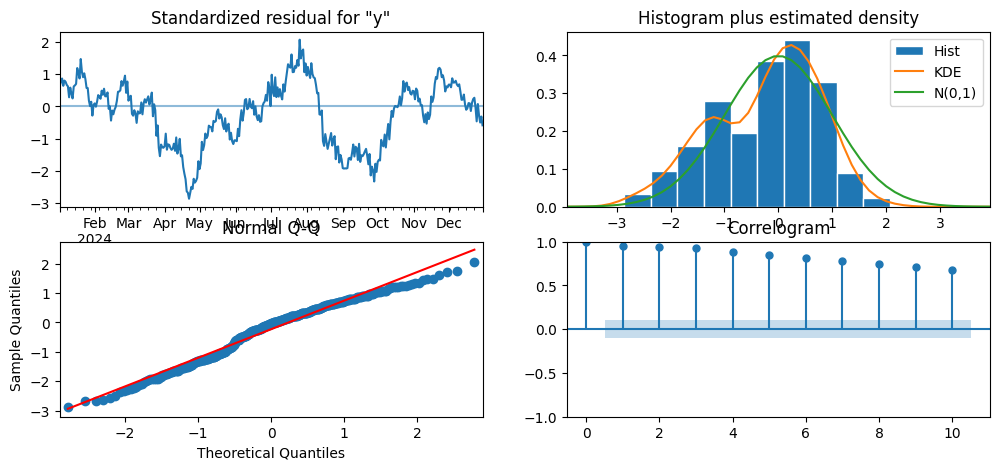

In [178]:
model = ARIMA(Z, order=(0,1,0)).fit()
model.plot_diagnostics()
plt.show()

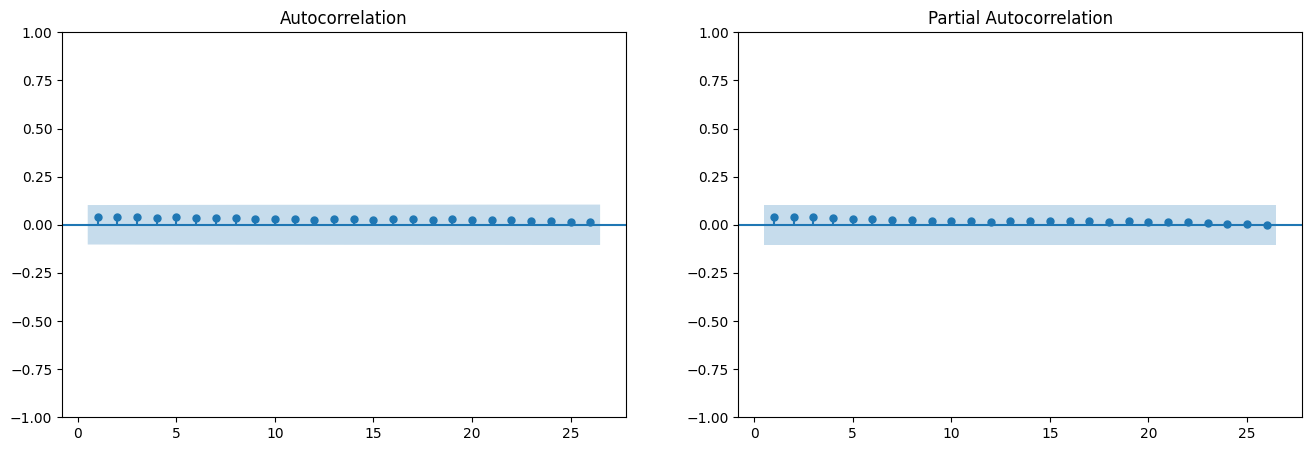

In [179]:
all_ac(model.resid)

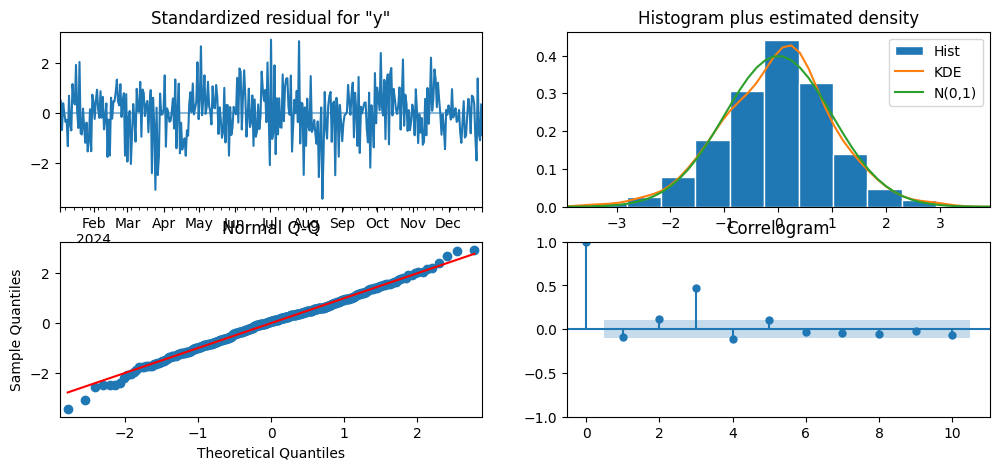

In [180]:
model = ARIMA(Z, order=(0,2,1)).fit()
model.plot_diagnostics()
plt.show()